In [62]:
# import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [63]:
# load the data from the file
data=pd.read_csv("dataset/housepricedata.csv")
data

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [64]:
# printing first 10 rows from the dataframe
data.head(10)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [65]:
# to find the size of the dataset
data.shape

(1460, 11)

In [66]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [67]:
# checking the null values
data.isna()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,False


In [68]:
# checking the null values by sum of all values
data.isna().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

In [69]:
# convert the data into an array
dataset = data.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [70]:
# initialized the dataset in X
X=dataset[:,0:10]
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [71]:
# initialized the dataset in Y
Y=dataset[:,10]
Y

array([1, 1, 1, ..., 1, 0, 0])

In [72]:
# preprocessing the X data values
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [73]:
# split the data into training and testing

X_train, X_test,y_train, y_test = train_test_split(X_scale, Y, test_size=0.2)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1168, 10)
y_train shape:  (1168,)
X_test shape:  (292, 10)
y_test shape:  (292,)


In [74]:
# create the ANN model
model=Sequential()
model.add(Dense(units=32, activation="relu", input_dim=10))   # hidden layer
model.add(Dense(units=32, activation="relu"))   #input layer
model.add(Dense(units=32, activation="relu"))   # input layer
model.add(Dense(units=1, activation="sigmoid"))  # output layer


In [75]:
# compile all layers
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                352       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# to train the model
hist=model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.6662 - accuracy: 0.5368
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.7791
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8467
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8587
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8673
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8784
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8784
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.8784
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.8878
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.8853
Epoch 11/

In [77]:
model.evaluate(X_test, y_test)[1]

10/10 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.8904


0.8904109597206116

In [78]:
# predicting the data
predict = model.predict(X_test)
predict[:10]

10/10 [==============================] - 0s 2ms/step


array([[7.3793381e-01],
       [9.7825134e-01],
       [9.8816621e-01],
       [1.5763365e-04],
       [2.2045833e-03],
       [7.1469094e-03],
       [1.4372521e-04],
       [2.2296596e-01],
       [1.5132949e-03],
       [9.8804557e-01]], dtype=float32)

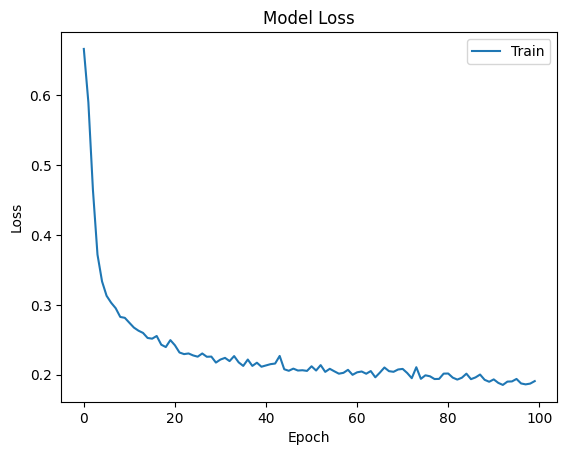

In [79]:
# visualize the Loss value
plt.plot(hist.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Val"], loc="upper right")

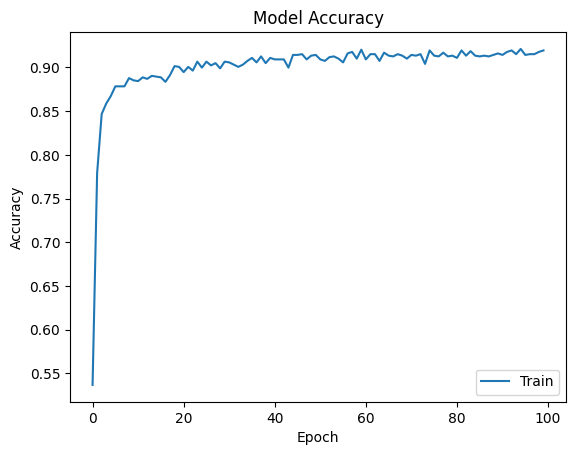

In [80]:
# visualize the Accuracy value
plt.plot(hist.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Val"], loc="lower right")